<a href="https://colab.research.google.com/github/bsoifer/AnalisisPredictivo/blob/main/TP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Final - Bruno Soifer (62423)

In [1]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102738 sha256=dee4599f51752de9a986a4f3d9bf3ab56ddfb27c6556753bf28ae6575957b8f5
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


## Lectura del dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import xgboost as xgb
from datetime import datetime
from dateutil import parser
import cartopy.crs as ccrs
from geopy.geocoders import Nominatim

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta completa al archivo CSV
file_path = '/content/drive/MyDrive/Materias 1C 2023/Análisis Predictivo/Final/weatherAUS2.csv'

# Leer el archivo CSV
rain = pd.read_csv(file_path, delimiter=';')

In [4]:
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainStreak,RainLast7Days
0,1/7/2008,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,No,1.0,1.0
1,2/7/2008,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,1022.4,1022.6,NaN,NaN,13.7,15.5,No,No,0.0,1.0
2,3/7/2008,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,1027.8,1026.5,NaN,NaN,9.3,13.9,No,No,0.0,1.0
3,4/7/2008,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,1028.7,1025.6,NaN,NaN,10.2,15.3,No,No,0.0,1.0
4,5/7/2008,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,...,1023.6,1020.2,NaN,NaN,11.3,13.8,No,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145458,24/6/2017,Woomera,11.5,20.9,0.0,4.0,NaN,W,33.0,WSW,...,1019.5,1017.5,7.0,NaN,12.5,20.7,No,No,0.0,0.0
145459,25/6/2017,Woomera,6.5,NaN,0.0,4.0,NaN,NaN,NaN,S,...,1022.5,1021.6,1.0,NaN,11.2,16.8,No,NaN,0.0,0.0
145460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
i = 16
print("Nombre de la columna:", rain.columns[i])
print("Tipo de dato de la columna:", rain.dtypes[i])
x = rain.columns[i]
repeticiones = rain[x].duplicated().any()
print("¿Hay repeticiones en los valores de la columna?", repeticiones)
print("¿Hay valores nulos en la columna?", rain[x].isnull().any())
valores_repetidos = rain[x].value_counts()
print(valores_repetidos.head())

Nombre de la columna: Pressure3pm
Tipo de dato de la columna: float64
¿Hay repeticiones en los valores de la columna? True
¿Hay valores nulos en la columna? True
1015.3    789
1015.5    788
1015.6    780
1015.7    774
1013.5    774
Name: Pressure3pm, dtype: int64


## Transformación de variables categóricas a numéricas

### Date

In [6]:
# Convertir la columna 'date' al formato de fecha
rain['Date'] = pd.to_datetime(rain['Date'], format='%d/%m/%Y')

In [7]:
# Agrega el día del mes del registro
rain['day_month'] = rain['Date'].dt.day

In [8]:
# Agrega una nueva columna con el día de la semana en formato numérico (1-7)
rain['weekday'] = rain['Date'].apply(lambda x: datetime.weekday(x) + 1)

In [9]:
# Agrega una nueva columna con el mes en formato numérico
rain['month'] = rain['Date'].dt.month

In [10]:
# Agrega una nueva columna con el año
rain['year'] = rain['Date'].dt.year

In [11]:
#Agrega una columna con la estación en la que se encuentra cada fecha

# Defino una función para obtener la estación del año
def obtener_estacion(fecha):
    mes = fecha.month
    dia = fecha.day

    if (mes == 12 and dia >= 21) or (mes == 1 or mes == 2) or (mes == 3 and dia <= 20):
        return 1  # Verano
    elif (mes == 3 and dia >= 21) or (mes == 4 or mes == 5) or (mes == 6 and dia <= 20):
        return 2  # Otoño
    elif (mes == 6 and dia >= 21) or (mes == 7 or mes == 8) or (mes == 9 and dia <= 20):
        return 3  # Invierno
    else:
        return 4  # Primavera

# Agrega una nueva columna con la estación del año
rain['estacion'] = rain['Date'].apply(obtener_estacion)

In [12]:
# Agrego una columna con el número de semana en la que se encuentra cada fecha
rain['week'] = rain['Date'].dt.isocalendar().week

In [13]:
min_date = rain['Date'].min()
rain['Date'] = (rain['Date'] - min_date).dt.days

### Location

In [14]:
ubicaciones = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']
latitudes = [-36.074, -33.886, -31.498, -30.296, -29.463, -32.926, -33.281, -29.040, -33.751, -33.598, -33.868, -33.946, -35.115, -32.798, -34.424, -35.280, -35.418, -35.529, -37.560, -36.758, -38.111, -37.667, -37.814, -34.185, -35.431, -38.351, -37.711, -37.922, -27.470, -16.925, -28.016, -19.257, -34.928, -37.828, -34.469, -31.200, -35.024, -34.029, -31.669, -31.940, -31.950, -32.986, -34.978, -42.882, -41.434, -23.698, -12.462, -14.464, -25.345]
longitudes = [146.922, 150.773, 145.841, 153.114, 149.841, 151.778, 151.567, 167.954, 150.694, 150.740, 151.209, 151.177, 147.367, 151.835, 150.893, 149.130, 149.086, 148.771, 143.858, 144.280, 147.066, 144.833, 144.963, 142.162, 141.287, 141.605, 145.083, 141.275, 153.025, 145.775, 153.375, 146.817, 138.601, 140.782, 138.993, 115.856, 116.397, 117.532, 119.744, 115.146, 138.600, 116.214, 145.951, 147.154, 135.450, 130.845, 132.365, 130.984, 130.988]

# Crear un diccionario con las ubicaciones, latitudes y longitudes
data = {'Location': ubicaciones, 'latitude': latitudes, 'longitude': longitudes}

# Crear un nuevo dataframe con los datos
df_nuevo = pd.DataFrame(data)

# Fusionar los dataframes rain y df_nuevo utilizando la columna 'Location' como clave
rain = rain.merge(df_nuevo, on='Location')

In [15]:
#Columna location_cluster

# Crea una lista de coordenadas a partir de las latitudes y longitudes
coordenadas = list(zip(rain['latitude'], rain['longitude']))

# Definir la cantidad de clusters deseada
num_clusters = 15

# Crear el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Entrenar el modelo con las coordenadas
kmeans.fit(coordenadas)

# Agregar la columna "location_cluster" al DataFrame "rain"
rain['location_cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Columna popular_city
# Lista de las ciudades más pobladas
ciudades_populares = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

# Crear la columna "is_popular" y asignar valores
rain['popular_city'] = rain['Location'].apply(lambda x: 1 if x in ciudades_populares else 0)


In [17]:
# Columna city_is_near_coast

# Definir los rangos de latitud y longitud para la región costera
latitud_min = -43.0
latitud_max = -10.0
longitud_min = 113.0
longitud_max = 153.0

# Crear la columna "is_near_coast" y asignar valores
rain['city_is_near_coast'] = rain.apply(lambda row: 1 if (latitud_min <= row['latitude'] <= latitud_max) and (longitud_min <= row['longitude'] <= longitud_max) else 0, axis=1)


In [18]:
# Modificar la ubicación para pasarla a número

# Creo una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajusto el LabelEncoder a la columna "Location"
rain['Location'] = label_encoder.fit_transform(rain['Location'])

### Wind

In [19]:
# Direcciones del viento
direcciones = ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', pd.NA, 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']

# Diccionario de mapeo de direcciones del viento a números
mapeo_direccion = {
    'W': 1,
    'WNW': 2,
    'WSW': 3,
    'NE': 4,
    'NNW': 5,
    'N': 6,
    'NNE': 7,
    'SW': 8,
    pd.NA: 0,
    'ENE': 9,
    'SSE': 10,
    'S': 11,
    'NW': 12,
    'SE': 13,
    'ESE': 14,
    'E': 15,
    'SSW': 16
}

# Reemplazar las direcciones del viento por números y los valores nulos por cero
rain['WindGustDir'] = rain['WindGustDir'].replace(mapeo_direccion)
rain['WindDir9am'] = rain['WindDir9am'].replace(mapeo_direccion)
rain['WindDir3pm'] = rain['WindDir3pm'].replace(mapeo_direccion)


### RainToday

In [20]:
# Reemplazar "yes" por 1 y cualquier otro valor por 0 en la columna "RainToday"
rain['RainToday'] = rain['RainToday'].replace({'Yes': 1, 'No': 0})

### RainTomorrow

In [21]:
# Reemplazar "yes" por 1 y cualquier otro valor por 0 en la columna a predecir
rain['RainTomorrow'] = rain['RainTomorrow'].replace({'Yes': 1, 'No': 0})

### Reemplazar valores nulos

In [22]:
# Reemplazar los valores nulos por cero en todas las columnas
rain.fillna(0, inplace=True)

## División train/test

In [23]:
# Dividir el 80% inicial en conjuntos de entrenamiento y prueba
rain_train, rain_test = train_test_split(rain, test_size=0.2, random_state=42)

Chequeo de valores de columnas en test (y compatración con valores en train)

In [24]:
i = 16
print("Nombre de la columna:", rain_train.columns[i])
print("Tipo de dato de la columna:", rain_train.dtypes[i])
x = rain_train.columns[i]
repeticiones = rain_train[x].duplicated().any()
print("¿Hay repeticiones en los valores de la columna?", repeticiones)
print("¿Hay valores nulos en la columna?", rain_train[x].isnull().any())
valores_repetidos = rain_train[x].value_counts()
print(valores_repetidos.head())

Nombre de la columna: Pressure3pm
Tipo de dato de la columna: float64
¿Hay repeticiones en los valores de la columna? True
¿Hay valores nulos en la columna? False
0.0       11474
1015.3      643
1015.5      637
1013.5      630
1015.7      623
Name: Pressure3pm, dtype: int64


## Regresión Logística

In [ ]:
# Definir los posibles valores de los hiperparámetros a probar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
}

X = rain_train.drop('RainTomorrow', axis=1)
y = rain_train['RainTomorrow']

# Crear el modelo de regresión logística
model = LogisticRegression()

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
y_pred = best_model.predict(X)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
auc_roc = roc_auc_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)

best_params = grid_search.best_params_
print("Mejores hiperparámetros: ", best_params)

print("Métricas de evaluación:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("AUC-ROC:", auc_roc)
print("Matriz de confusión:")
print(confusion)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores hiperparámetros:  {'C': 0.1, 'penalty': 'l2'}
Métricas de evaluación:
Accuracy: 0.7803777670837344
Precision: 0.47901234567901235
AUC-ROC: 0.5026364278878812
Matriz de confusión:
[[90617   211]
 [25346   194]]


In [ ]:
# Crea una instancia del modelo de Regresión Logística con los mejores hiperparámetros
mejor_modelo = LogisticRegression(C=0.1, penalty='l2')

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)


Accuracy 0.7963567623302973
Precisión: 52.87%
AUC-ROC: 0.51
Matriz de confusión:
[[4588   41]
 [1144   46]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

### DecisionTree v1

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = rain_train.drop('RainTomorrow', axis=1)
y = rain_train['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo del árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7064965197215777
Precision: 0.34459955914768553
AUC-ROC: 0.5841524719497716
Confusion Matrix:
[[14567  3568]
 [ 3263  1876]]


In [ ]:
# Crea una instancia del modelo de DecisionTree
mejor_modelo = DecisionTreeClassifier()

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)


Accuracy 0.7023543564186286
Precisión: 29.72%
AUC-ROC: 0.57
Matriz de confusión:
[[3690  939]
 [ 793  397]]


### DecisionTree v2

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = rain_train.drop('RainTomorrow', axis=1)
y = rain_train['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros que deseas probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo del árbol de decisión
model = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros en todo el conjunto de entrenamiento
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular las métricas con el mejor modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas con el mejor modelo
print("Accuracy:", accuracy)
print("Precision:", precision)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(confusion)


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7863710578327747
Precision: 0.5540453074433657
AUC-ROC: 0.5642882699659153
Confusion Matrix:
[[17446   689]
 [ 4283   856]]


In [ ]:
# Crea una instancia del modelo de DecisionTree
mejor_modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)

Accuracy 0.7979034198315862
Precisión: 51.72%
AUC-ROC: 0.57
Matriz de confusión:
[[4432  197]
 [ 979  211]]


## Random Forrest

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = rain_train.drop('RainTomorrow', axis=1)
y = rain_train['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros que deseas probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear el modelo de Random Forest
model = RandomForestClassifier()

# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros en todo el conjunto de entrenamiento
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular las métricas con el mejor modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas con el mejor modelo
print("Accuracy:", accuracy)
print("Precision:", precision)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(confusion)


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.7938901778808971
Precision: 0.6094750320102432
AUC-ROC: 0.5758067171829105
Confusion Matrix:
[[17525   610]
 [ 4187   952]]


In [ ]:
# Crea una instancia del modelo de DecisionTree
mejor_modelo = RandomForestClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 300)

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)

Accuracy 0.8027152431689294
Precisión: 55.38%
AUC-ROC: 0.57
Matriz de confusión:
[[4455  174]
 [ 974  216]]


## Gradient Boosting

### Gradient Boosting v1

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = rain_train.drop('RainTomorrow', axis=1)
y = rain_train['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo del árbol de decisión
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7890779410500989
Precision: 0.5855654761904762
AUC-ROC: 0.5612142729876191
Confusion Matrix:
[[17578   557]
 [ 4352   787]]


In [ ]:
# Crea una instancia del modelo de DecisionTree
mejor_modelo = GradientBoostingClassifier()

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)

Accuracy 0.803230795669359
Precisión: 57.73%
AUC-ROC: 0.56
Matriz de confusión:
[[4506  123]
 [1022  168]]


## XGBoost

### XGBoost v1

In [ ]:
rain_train['week'] = rain_train['week'].astype(float)

# Dividir los datos en características (X) y variable objetivo (y)
X = rain_train.drop('RainTomorrow', axis=1)
y = rain_train['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo del árbol de decisión
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7964681618973962
Precision: 0.5953510436432637
AUC-ROC: 0.5985874089879514
Confusion Matrix:
[[17282   853]
 [ 3884  1255]]


In [ ]:
rain_test['week'] = rain_test['week'].astype(float)

# Crea una instancia del modelo de DecisionTree
mejor_modelo = xgb.XGBClassifier()

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)


Accuracy 0.8025433923354528
Precisión: 53.57%
AUC-ROC: 0.60
Matriz de confusión:
[[4362  267]
 [ 882  308]]


### XGBoost v2

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = rain_test.drop('RainTomorrow', axis=1)
y = rain['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros que deseas probar
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el modelo de XGBoost
model = xgb.XGBClassifier()

# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros en todo el conjunto de entrenamiento
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

Mejores hiperparámetros obtenidos por GridSearch en train:


> learning_rate = 0.01, n_estimators = 150, max_depth = 5, min_child_weight = 1, subsample = 1.0, colsample_bytree = 0.8

In [ ]:
rain_test['week'] = rain_test['week'].astype(float)

# Crea una instancia del modelo de DecisionTree
mejor_modelo = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 150, max_depth = 5, min_child_weight = 1, subsample = 1.0, colsample_bytree = 0.8)

# Separo el dataframe con los features de la variable objetivo
X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo con los datos de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprime las métricas de evaluación
print("Accuracy", accuracy)
print("Precisión: {:.2f}%".format(precision * 100))
print("AUC-ROC: {:.2f}".format(auc_roc))
print("Matriz de confusión:")
print(confusion_mat)

Accuracy 0.805464856504554
Precisión: 60.51%
AUC-ROC: 0.56
Matriz de confusión:
[[4520  109]
 [1023  167]]


In [ ]:
# Entrenar el modelo XGBoost
model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 150, max_depth = 5, min_child_weight = 1, subsample = 1.0, colsample_bytree = 0.8)

X = rain_test.drop('RainTomorrow', axis=1)
y = rain_test['RainTomorrow']

model.fit(X, y)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame con las características y su importancia
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia de mayor a menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame ordenado
print(df_importance)

               Feature  Importance
21           RainToday    0.567646
22          RainStreak    0.221223
23       RainLast7Days    0.027258
28            estacion    0.010608
1             Location    0.010495
30            latitude    0.010364
31           longitude    0.007513
4             Rainfall    0.007070
7          WindGustDir    0.006737
29                week    0.006643
14         Humidity3pm    0.006488
2              MinTemp    0.006210
20             Temp3pm    0.006042
3              MaxTemp    0.005930
8        WindGustSpeed    0.005819
18            Cloud3pm    0.005749
15         Pressure9am    0.005692
34  city_is_near_coast    0.005654
16         Pressure3pm    0.005597
5          Evaporation    0.005500
32    location_cluster    0.005430
19             Temp9am    0.005239
11        WindSpeed9am    0.005183
26               month    0.005048
9           WindDir9am    0.004519
24           day_month    0.004459
13         Humidity9am    0.004455
6             Sunshi

## Mejores Modelos



```
XGBoost

Accuracy 0.805464856504554
Precisión: 60.51%
AUC-ROC: 0.56
```





```
Gradient Boosting

Accuracy 0.803230795669359
Precisión: 57.73%
AUC-ROC: 0.56

```





```
Random Forrest

Accuracy 0.8027152431689294
Precisión: 55.38%
AUC-ROC: 0.57
```





```
Decision Tree

Accuracy 0.7979034198315862
Precisión: 51.72%
AUC-ROC: 0.57
```





```
Regresión Logística

Accuracy 0.7963567623302973
Precisión: 52.87%
AUC-ROC: 0.51

```





```
LightGBM:
```



## Gráficos

In [ ]:
# Calcula el porcentaje de valores NaN por columna
porcentaje_na_por_columna = rain.isna().mean() * 100

print("Porcentaje de NaN por columna:")
print(porcentaje_na_por_columna)

Porcentaje de NaN por columna:
Date              0.002062
Location          0.002062
MinTemp           0.651025
MaxTemp           0.589153
Rainfall          1.918701
Evaporation      42.838385
Sunshine         47.923527
WindGustDir       6.687611
WindGustSpeed     6.644989
WindDir9am        6.822353
WindDir3pm        2.509917
WindSpeed9am      0.788517
WindSpeed3pm      1.708338
Humidity9am       1.412043
Humidity3pm       2.718217
Pressure9am       9.924861
Pressure3pm       9.916611
Cloud9am         38.050913
Cloud3pm         40.588328
Temp9am           0.801578
Temp3pm           2.099503
RainToday         2.243870
RainTomorrow      2.247994
RainStreak        0.002062
RainLast7Days     0.002062
dtype: float64


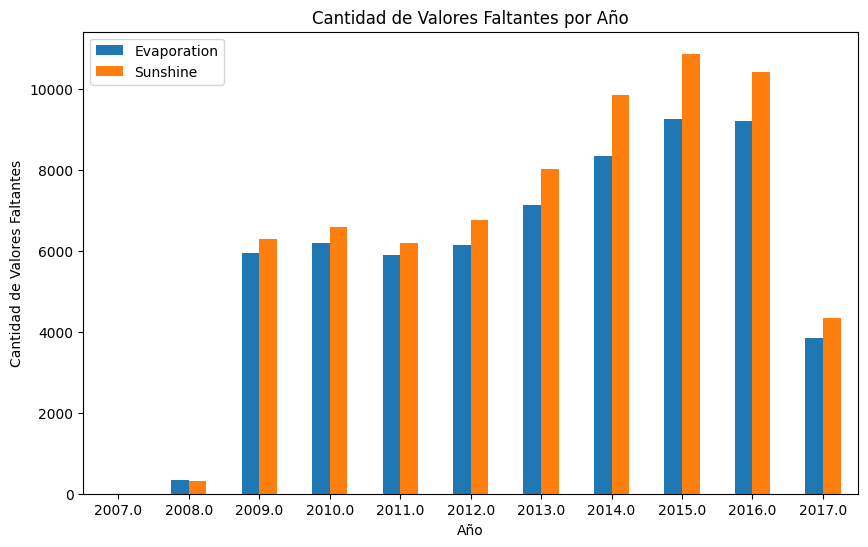

In [ ]:
# Agrupa los valores faltantes por año en las columnas 'evaporation' y 'sunshine'
missings_por_anio = rain.groupby('year')[['Evaporation', 'Sunshine']].apply(lambda x: x.isna().sum())

# Crea el gráfico de barras
missings_por_anio.plot(kind='bar', figsize=(10, 6))

# Personaliza el gráfico
plt.title('Cantidad de Valores Faltantes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Valores Faltantes')
plt.legend(['Evaporation', 'Sunshine'])
plt.xticks(rotation=0)

plt.show()

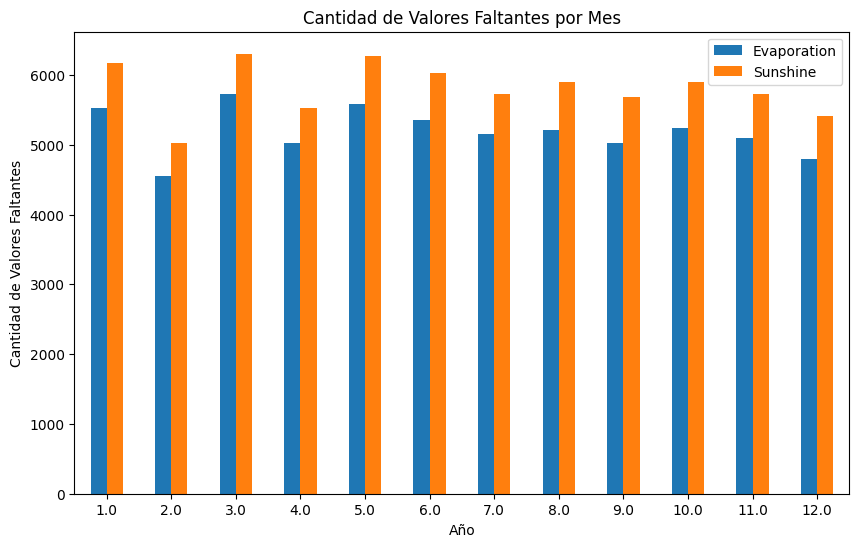

In [ ]:
# Agrupa los valores faltantes por año en las columnas 'evaporation' y 'sunshine'
missings_por_anio = rain.groupby('month')[['Evaporation', 'Sunshine']].apply(lambda x: x.isna().sum())

# Crea el gráfico de barras
missings_por_anio.plot(kind='bar', figsize=(10, 6))

# Personaliza el gráfico
plt.title('Cantidad de Valores Faltantes por Mes')
plt.xlabel('Año')
plt.ylabel('Cantidad de Valores Faltantes')
plt.legend(['Evaporation', 'Sunshine'])
plt.xticks(rotation=0)

plt.show()

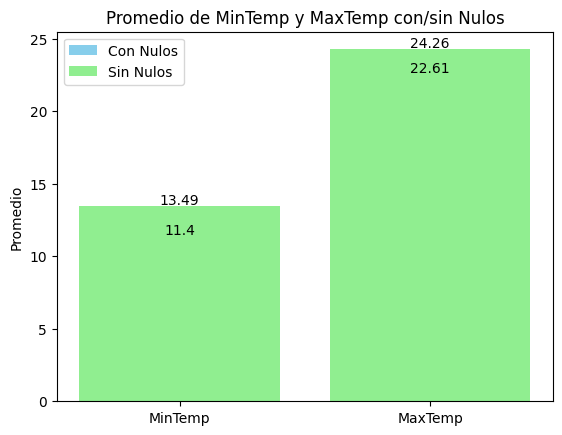

In [ ]:
# Calcula el promedio de 'MinTemp' para filas con al menos un valor nulo
promedio_min_temp_con_nulos = rain[rain.isnull().any(axis=1)]['MinTemp'].mean()

# Calcula el promedio de 'MinTemp' para filas sin valores nulos
promedio_min_temp_sin_nulos = rain[~rain.isnull().any(axis=1)]['MinTemp'].mean()

# Calcula el promedio de 'MaxTemp' para filas con al menos un valor nulo
promedio_max_temp_con_nulos = rain[rain.isnull().any(axis=1)]['MaxTemp'].mean()

# Calcula el promedio de 'MaxTemp' para filas sin valores nulos
promedio_max_temp_sin_nulos = rain[~rain.isnull().any(axis=1)]['MaxTemp'].mean()

# Crear una lista con los promedios
promedios_con_nulos = [promedio_min_temp_con_nulos, promedio_max_temp_con_nulos]
promedios_sin_nulos = [promedio_min_temp_sin_nulos, promedio_max_temp_sin_nulos]

# Etiquetas de las barras
etiquetas = ['MinTemp', 'MaxTemp']

# Coordenadas de las barras
x = range(len(etiquetas))

# Crear la figura y los ejes del gráfico de barras
fig, ax = plt.subplots()

# Crear las barras para promedios con nulos
ax.bar(x, promedios_con_nulos, label='Con Nulos', color='skyblue')

# Crear las barras para promedios sin nulos
ax.bar(x, promedios_sin_nulos, label='Sin Nulos', color='lightgreen')

# Agregar etiquetas a las barras
for i, v in enumerate(promedios_con_nulos):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center')

for i, v in enumerate(promedios_sin_nulos):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center')

# Personalizar el gráfico
ax.set_ylabel('Promedio')
ax.set_title('Promedio de MinTemp y MaxTemp con/sin Nulos')
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
ax.legend()

# Mostrar el gráfico de barras
plt.show()

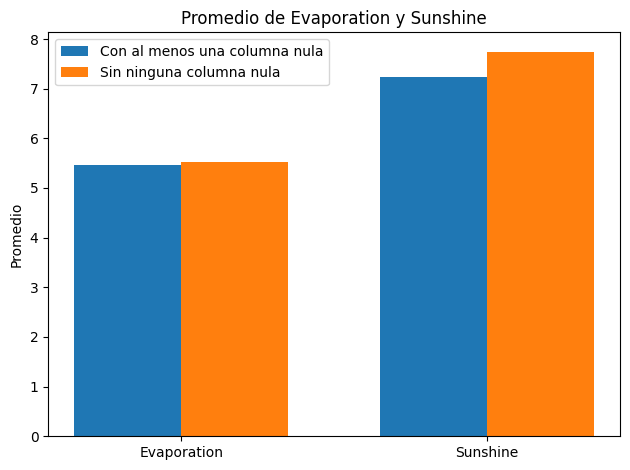

In [ ]:
# Separar filas con al menos una columna nula y filas sin ninguna columna nula
filas_con_nulos = rain[rain.isnull().any(axis=1)]
filas_sin_nulos = rain[~rain.isnull().any(axis=1)]

# Calcular el promedio de 'Evaporation' y 'Sunshine' para filas con al menos una columna nula
promedio_con_nulos = filas_con_nulos[['Evaporation', 'Sunshine']].mean()

# Calcular el promedio de 'Evaporation' y 'Sunshine' para filas sin ninguna columna nula
promedio_sin_nulos = filas_sin_nulos[['Evaporation', 'Sunshine']].mean()

# Crear figura y ejes para el gráfico de promedios
fig, ax = plt.subplots()
bar_width = 0.35

# Coordenadas de las barras
x1 = range(len(promedio_con_nulos))
x2 = [x + bar_width for x in x1]

# Crear las barras para los promedios con al menos una columna nula
ax.bar(x1, promedio_con_nulos, bar_width, label='Con al menos una columna nula')

# Crear las barras para los promedios sin ninguna columna nula
ax.bar(x2, promedio_sin_nulos, bar_width, label='Sin ninguna columna nula')

# Etiquetas de las barras
ax.set_xticks([x + bar_width/2 for x in range(len(promedio_con_nulos))])
ax.set_xticklabels(promedio_con_nulos.index)

# Etiquetas de los ejes y título del gráfico
ax.set_ylabel('Promedio')
ax.set_title('Promedio de Evaporation y Sunshine')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

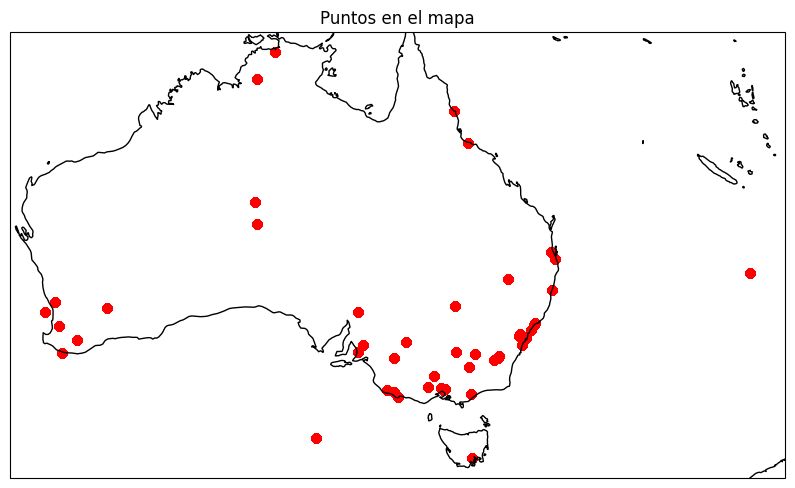

In [ ]:
# Crear el mapa
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar las costas y fronteras
ax.coastlines()

# Graficar los puntos en el mapa
ax.scatter(rain['longitude'], rain['latitude'], marker='o', color='red', alpha=0.7, transform=ccrs.PlateCarree())

# Título del mapa
plt.title('Puntos en el mapa')

# Mostrar el mapa
plt.show()

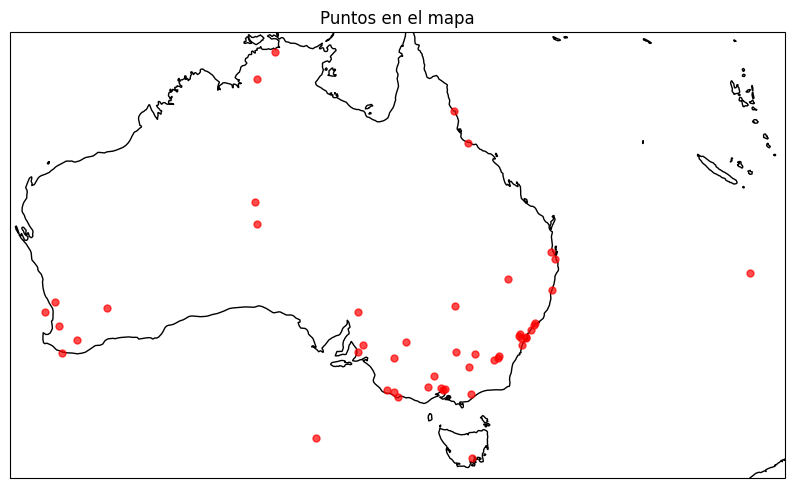

In [ ]:
# Obtener los valores únicos de latitud y longitud
unique_latitudes = rain['latitude'].unique()
unique_longitudes = rain['longitude'].unique()

# Crear el mapa
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar las costas y fronteras
ax.coastlines()

# Graficar un punto para cada valor único de latitud y longitud
for lat, lon in zip(unique_latitudes, unique_longitudes):
    ax.plot(lon, lat, marker='o', markersize=5, color='red', alpha=0.7, transform=ccrs.PlateCarree())

# Título del mapa
plt.title('Puntos en el mapa')

# Mostrar el mapa
plt.show()


<ipython-input-65-4d4e5d3752a2>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3')


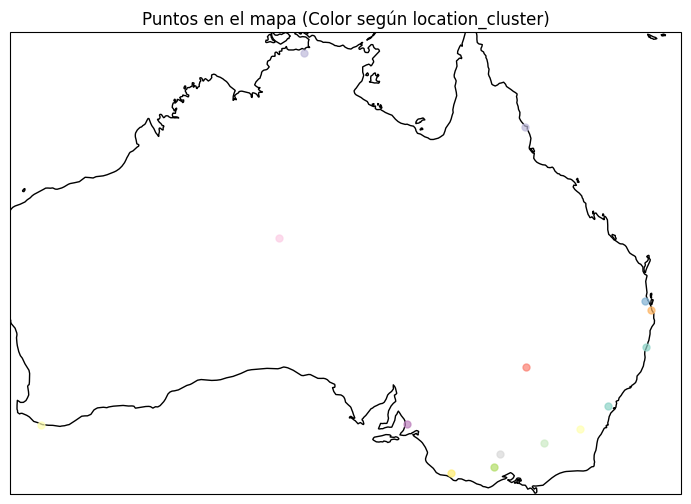

In [ ]:
# Obtener los valores únicos de latitud, longitud y location_cluster
unique_latitudes = rain['latitude'].unique()
unique_longitudes = rain['longitude'].unique()
unique_clusters = rain['location_cluster'].unique()

# Crear el mapa
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar las costas y fronteras
ax.coastlines()

# Definir una paleta de colores
cmap = plt.cm.get_cmap('Set3')

# Graficar un punto para cada valor único de latitud y longitud, con color según location_cluster
for lat, lon, cluster in zip(unique_latitudes, unique_longitudes, unique_clusters):
    color = cmap(cluster % cmap.N)  # Obtener el color correspondiente al cluster
    ax.plot(lon, lat, marker='o', markersize=5, color=color, alpha=0.7, transform=ccrs.PlateCarree())

# Título del mapa
plt.title('Puntos en el mapa (Color según location_cluster)')

# Mostrar el mapa
plt.show()


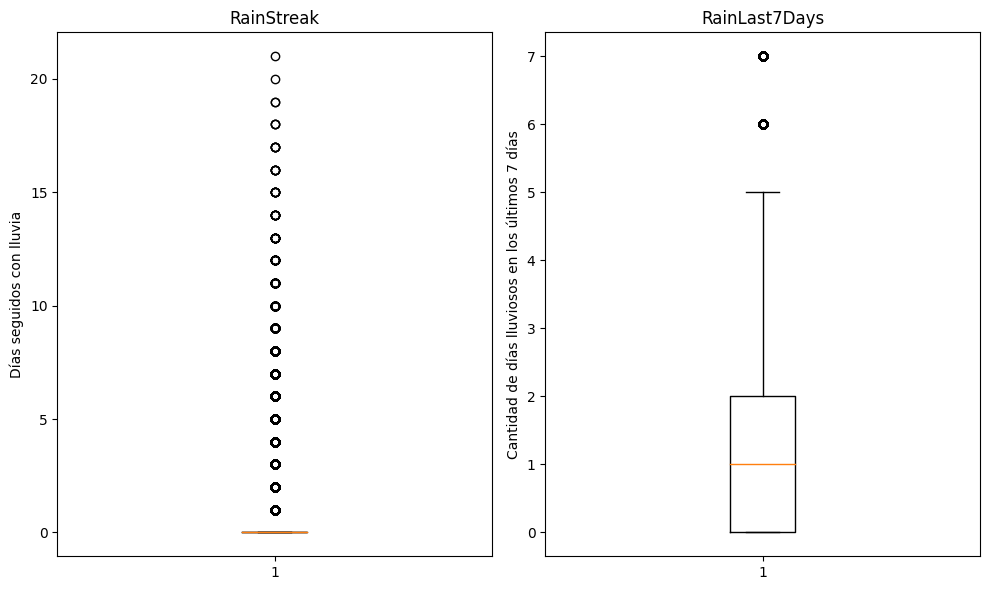

In [ ]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Boxplot para la columna "RainStreak"
axes[0].boxplot(rain['RainStreak'])
axes[0].set_title('RainStreak')
axes[0].set_ylabel('Días seguidos con lluvia')

# Boxplot para la columna "RainLast7Days"
axes[1].boxplot(rain['RainLast7Days'])
axes[1].set_title('RainLast7Days')
axes[1].set_ylabel('Cantidad de días lluviosos en los últimos 7 días')

# Ajustar el espacio entre los subplots
fig.tight_layout()

# Mostrar los boxplots
plt.show()